# Getting started with Graphviz 

This notebook is based on http://matthiaseisen.com/articles/graphviz/

## Install

Download window version at http://www.graphviz.org/Download_windows.php

Install at C:\Pr0gram\Graphviz2.38 
docs are found at subfolder = share\graphviz

add dot.exe to PATH

test install:
   > dot -v

install python package:
   > pip install graphviz

## Reference

* [Graphviz Homepage](http://www.graphviz.org/Home.php)
* [Explore Gallery](http://www.graphviz.org/Gallery.php)
  - [large network](http://yifanhu.net/GALLERY/GRAPHS/index.html)
* [Graphviz and the Dot language](http://www.graphviz.org/pdf/dotguide.pdf)
* [graphviz python pkg](http://graphviz.readthedocs.io/en/stable/manual.html)

In [6]:
from IPython.display import HTML,SVG,YouTubeVideo

In [1]:
import graphviz as gv

## Hello Graphviz

In [2]:
g1 = gv.Graph(format='svg')
g1.node('A')
g1.node('B')
g1.edge('A', 'B')

In [3]:
print(g1.source)

graph {
	A
	B
		A -- B
}


In [4]:
filename = g1.render(filename='img/g1')

In [5]:
dir

<function dir>

In [7]:
filename

'img/g1.svg'

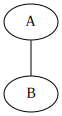

In [8]:
SVG(filename)

## Directed Graphs

In [10]:
g2 = gv.Digraph(format='svg')
g2.node('A')
g2.node('B')
g2.edge('A', 'B')
filename = g2.render('img/g2')

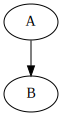

In [11]:
SVG(filename)

## A more concise approach

In [12]:
import functools
graph = functools.partial(gv.Graph, format='svg')
digraph = functools.partial(gv.Digraph, format='svg')

In [13]:
# create graph
g3 = graph()

# define nodes
nodes = ['A', 'B', ('C', {})]

# define edeges
edges = [
    ('A', 'B'),
    ('B', 'C'),
    (('A', 'C'), {}),
]

In [14]:
def add_nodes(graph, nodes):
    for n in nodes:
        if isinstance(n, tuple):
            graph.node(n[0], **n[1])
        else:
            graph.node(n)
    return graph

In [15]:
def add_edges(graph, edges):
    for e in edges:
        if isinstance(e[0], tuple):
            graph.edge(*e[0], **e[1])
        else:
            graph.edge(*e)
    return graph

In [16]:
g3 = add_nodes(g3, nodes)
g3 = add_edges(g3, edges)

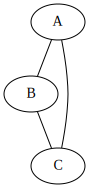

In [18]:
filename3 = g3.render('img/g2')
SVG(filename3)

### chain

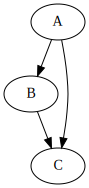

In [20]:
g4 = add_edges(
         add_nodes(digraph(), ['A', 'B', 'C']),
         [('A', 'B'), ('A', 'C'), ('B', 'C')]
)

SVG(g4.render('img/g4'))

## Labels

Labeling nodes and edges is as easy as adding an entry to their dictionaries of attributes.

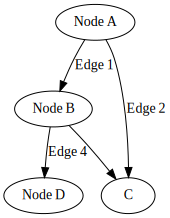

In [21]:
SVG(
    add_edges(
        add_nodes(digraph(), [
            ('A', {'label': 'Node A'}),
            ('B', {'label': 'Node B'}),
            'C',
            ('D', {'label': 'Node D'})
        ]),
        [
            (('A', 'B'), {'label': 'Edge 1'}),
            (('A', 'C'), {'label': 'Edge 2'}),
            ('B', 'C'),
            (('B', 'D'), {'label': 'Edge 4'}),
        ]
    ).render('img/g5')
)

## Styling

In [22]:
g6 = add_edges(
    add_nodes(digraph(), [
        ('A', {'label': 'Node A'}),
        ('B', {'label': 'Node B'}),
        'C'
    ]),
    [
        (('A', 'B'), {'label': 'Edge 1'}),
        (('A', 'C'), {'label': 'Edge 2'}),
        ('B', 'C')
    ]
)

 use a simple dictionary to specifiy the attributes that we want to change

In [23]:
styles = {
    'graph': {
        'label': 'A Fancy Graph',
        'fontsize': '16',
        'fontcolor': 'white',
        'bgcolor': '#333333',
        'rankdir': 'BT',
    },
    'nodes': {
        'fontname': 'Helvetica',
        'shape': 'hexagon',
        'fontcolor': 'white',
        'color': 'white',
        'style': 'filled',
        'fillcolor': '#006699',
    },
    'edges': {
        'style': 'dashed',
        'color': 'white',
        'arrowhead': 'open',
        'fontname': 'Courier',
        'fontsize': '12',
        'fontcolor': 'white',
    }
}

In [24]:
def apply_styles(graph, styles):
    graph.graph_attr.update(
        ('graph' in styles and styles['graph']) or {}
    )
    graph.node_attr.update(
        ('nodes' in styles and styles['nodes']) or {}
    )
    graph.edge_attr.update(
        ('edges' in styles and styles['edges']) or {}
    )
    return graph

In [ ]:
g6 = apply_styles(g6, styles)
g6.render('img/g6')

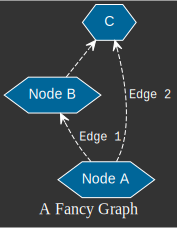

In [26]:
g6 = apply_styles(g6, styles)
SVG(g6.render('img/g6'))

## Subgraphs

First, let's create two seperate graphs g7 and g8, each with their own styling.

In [33]:
g7 = add_edges(
    add_nodes(digraph(), [
        ('A', {'label': 'Node A'}),
        ('B', {'label': 'Node B'}),
        'C'
    ]),
    [
        (('A', 'B'), {'label': 'Edge 1'}),
        (('A', 'C'), {'label': 'Edge 2'}),
        ('B', 'C')
    ]
)

In [34]:
g8 = apply_styles(
    add_edges(
        add_nodes(digraph(), [
            ('D', {'label': 'Node D'}),
            ('E', {'label': 'Node E'}),
            'F'
        ]),
        [
            (('D', 'E'), {'label': 'Edge 3'}),
            (('D', 'F'), {'label': 'Edge 4'}),
            ('E', 'F')
        ]
    ),
    {
        'nodes': {
            'shape': 'square',
            'style': 'filled',
            'fillcolor': '#cccccc',
        }
    }
)

we combine the two graphs by making g8 a subgraph of g7 and adding an extra edge to connect the two:

In [35]:
g7.subgraph(g8)
g7.edge('B', 'D', color='red', weight='2')

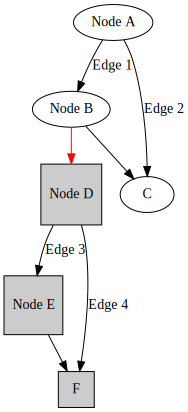

In [36]:
SVG(g7.render('img/g7'))


http://www.graphviz.org/content/fsm

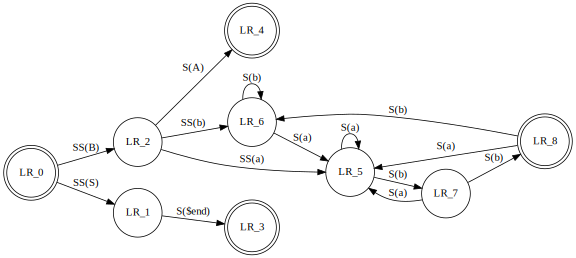

In [9]:
import graphviz as gv
f = gv.Digraph('finite_state_machine', filename='fsm.gv')
f.attr(rankdir='LR', size='8,5')

f.attr('node', shape='doublecircle')
f.node('LR_0')
f.node('LR_3')
f.node('LR_4')
f.node('LR_8')

f.attr('node', shape='circle')
f.edge('LR_0', 'LR_2', label='SS(B)')
f.edge('LR_0', 'LR_1', label='SS(S)')
f.edge('LR_1', 'LR_3', label='S($end)')
f.edge('LR_2', 'LR_6', label='SS(b)')
f.edge('LR_2', 'LR_5', label='SS(a)')
f.edge('LR_2', 'LR_4', label='S(A)')
f.edge('LR_5', 'LR_7', label='S(b)')
f.edge('LR_5', 'LR_5', label='S(a)')
f.edge('LR_6', 'LR_6', label='S(b)')
f.edge('LR_6', 'LR_5', label='S(a)')
f.edge('LR_7', 'LR_8', label='S(b)')
f.edge('LR_7', 'LR_5', label='S(a)')
f.edge('LR_8', 'LR_6', label='S(b)')
f.edge('LR_8', 'LR_5', label='S(a)')

f

## use raw DOT

To render a ready-made DOT source code string (instead of assembling one with the higher-level interface of Graph or Digraph), create a Source object holding your DOT string:

In [2]:
from graphviz import Source

In [3]:
src = Source('digraph "the holy hand grenade" { rankdir=LR; "ML" -> "AI" -> "IoT" -> "Cloud" }')

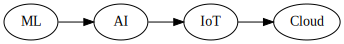

In [4]:
src

In [5]:
src.render('test-output/holy-grenade.gv', view=True)  

'test-output/holy-grenade.gv.pdf'

In [6]:
src2 = Source(""" 
digraph G {
  size ="4,4";
  main [shape=box]; /* this is a comment */
  main -> parse [weight=8];
  parse -> execute;
  main -> init [style=dotted];
  main -> cleanup;
  execute -> { make_string; printf};
  init [shape=circle, color="red"];
  init -> make_string;
  edge [color=red]; // so is this
  main -> printf [style=bold,label="100 times"];
  make_string [label="make a\nstring"];
  node [shape=box,style=filled,color=".7 .3 1.0"];
  execute -> compare;
}
""")

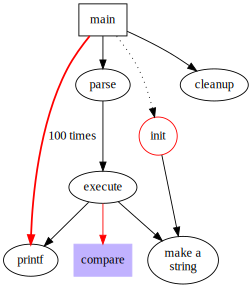

In [7]:
src2